## Phase 1: Exploratory Data Analysis (EDA)

Objective:
- Understand customer behavior
- Identify churn patterns
- Generate hypotheses for modeling



In [1]:
import sys
sys.path.append("../src")


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_audit import basic_data_audit
from eda_utils import churn_rate  # optional helper

plt.style.use("default")

In [3]:
# Load data
df = pd.read_csv("../data/raw/telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# data audit
audit = basic_data_audit(df)
audit

{'shape': (7043, 21),
 'missing_values': customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 'duplicates': np.int64(0),
 'dtypes': customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies  

In [5]:
# TotalCharges was string, convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [6]:
# Target Variable Analysis
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

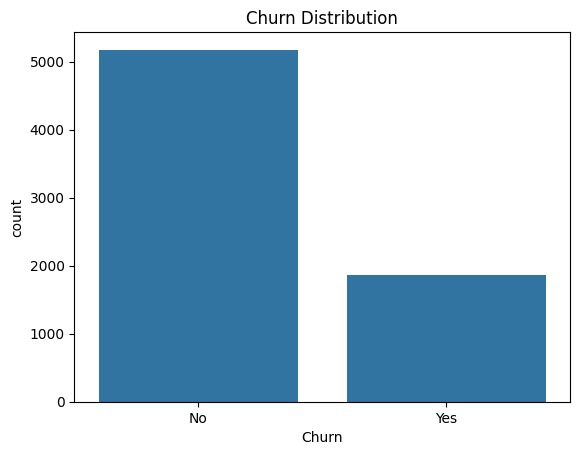

In [7]:
sns.countplot(x='Churn', data = df)
plt.title("Churn Distribution")
plt.show()

In [8]:
# -> from the graph we can say that, dataset is moderately imbalanced

In [9]:
# Tenure Lifecycle Analysis
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 6, 12, 24, 72],
    labels=['0-6', '6-12', '12-24', '24+']
)


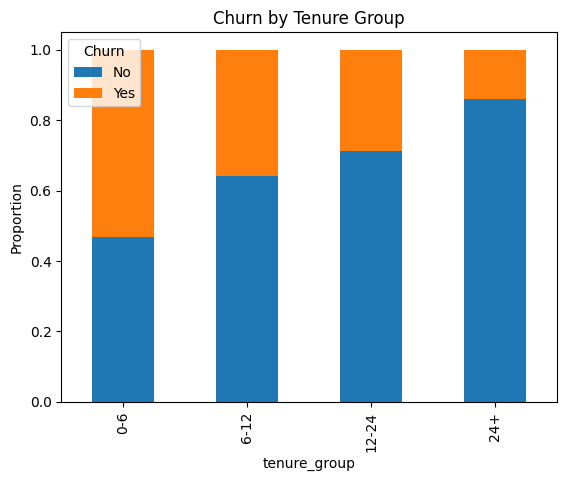

In [10]:
# Tenure vs Churn
tenure_churn = (
    df.groupby('tenure_group', observed=True)['Churn']
      .value_counts(normalize=True)
      .unstack()
)

tenure_churn.plot(kind='bar', stacked=True)
plt.title("Churn by Tenure Group")
plt.ylabel("Proportion")
plt.show()


In [11]:
# -> Early-stage customers are highest churn risk.

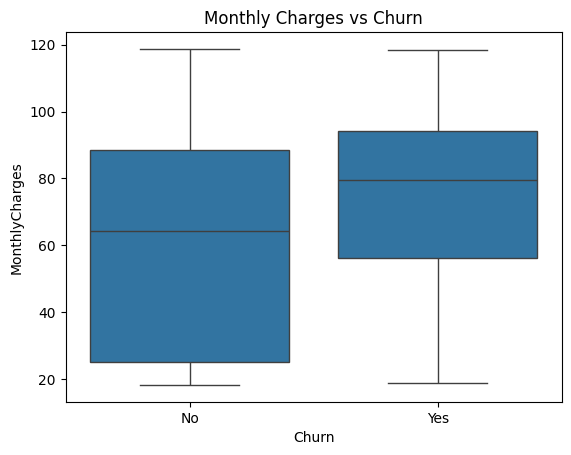

In [12]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [13]:
# -> High charges increase churn probability.

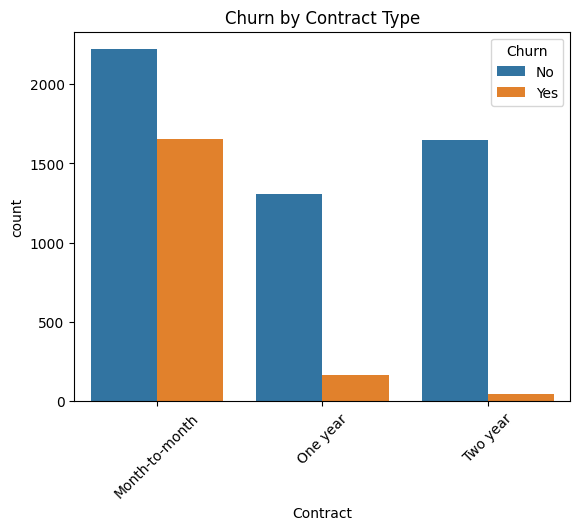

In [14]:
# Contract Type Analysis
sns.countplot(x='Contract', hue='Churn', data = df)
plt.xticks(rotation=45)
plt.title("Churn by Contract Type")
plt.show()

In [15]:
# -> Month-to-month contracts dominate churn.

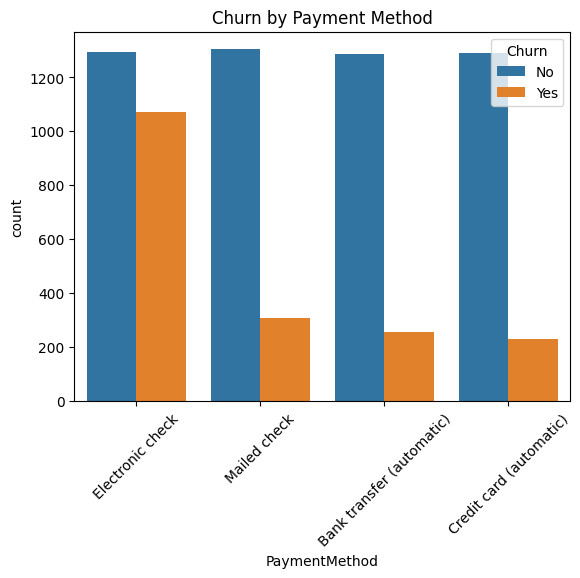

In [16]:
 # Payment Method Analysis
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


In [17]:
# -> Electronic check users churn more.

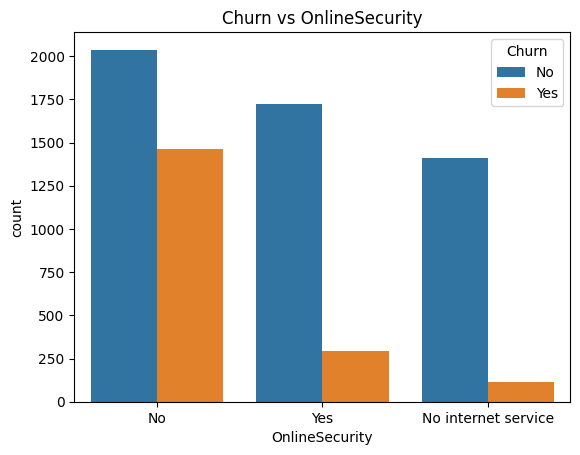

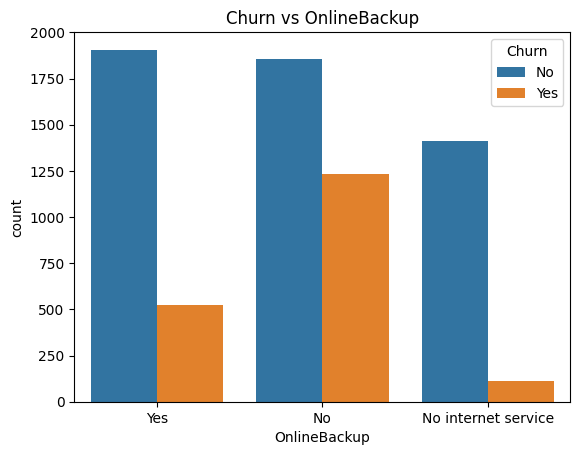

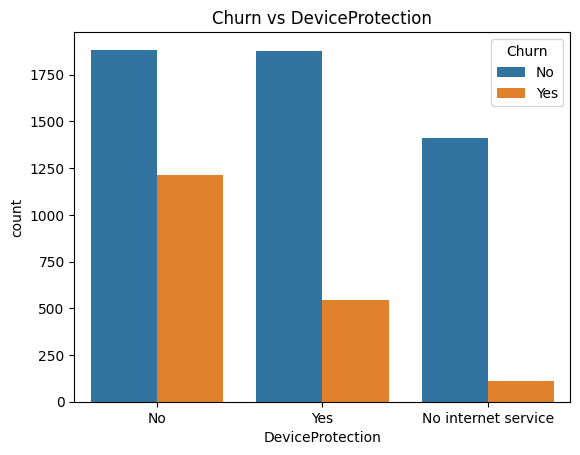

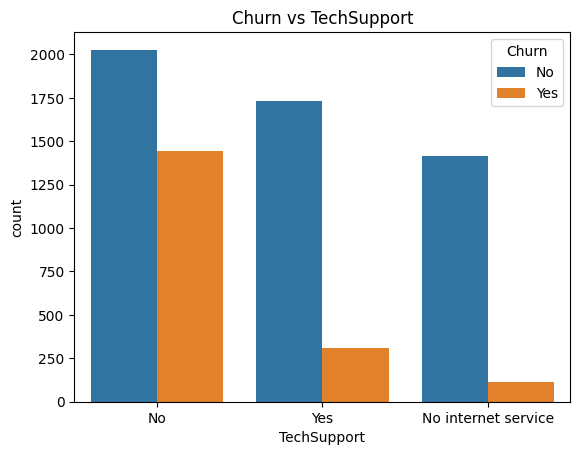

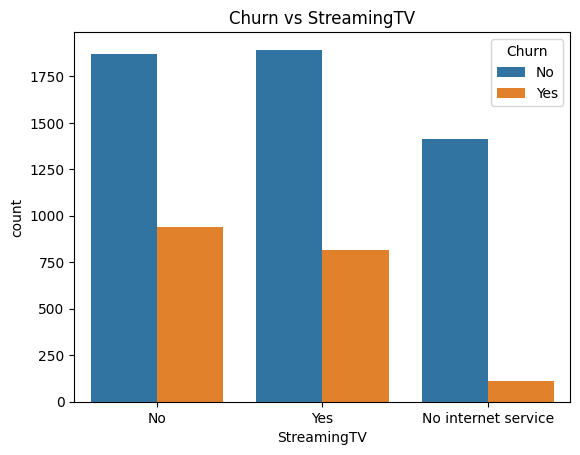

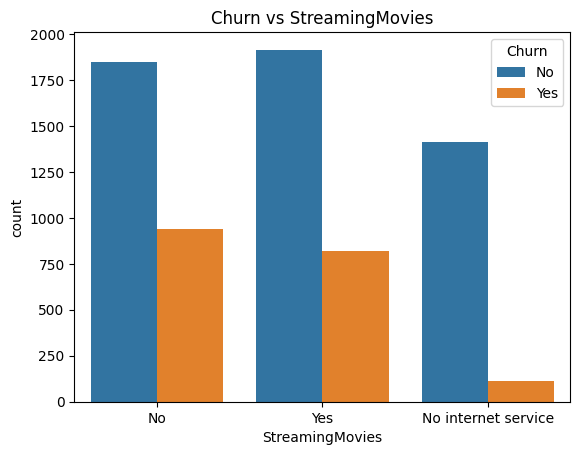

In [18]:
# Service Dependency Analysis
services = [
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

for service in services:
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f"Churn vs {service}")
    plt.show()



In [19]:
# -> Customers with fewer services churn more.